In [1]:
from utils import heatmap as heat
from keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

2022-11-25 16:27:33.225117: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [31]:
img_path = 'database/misc_images/ISIC_0030757.png'

# VGG

In [5]:
vgg = load_model("VGG16.h5") 

1/1 [==============================] - 0s 27ms/step
Predicted: [[0.01077324 0.00221344 0.98251814 0.00449525]]
Classes:  misc


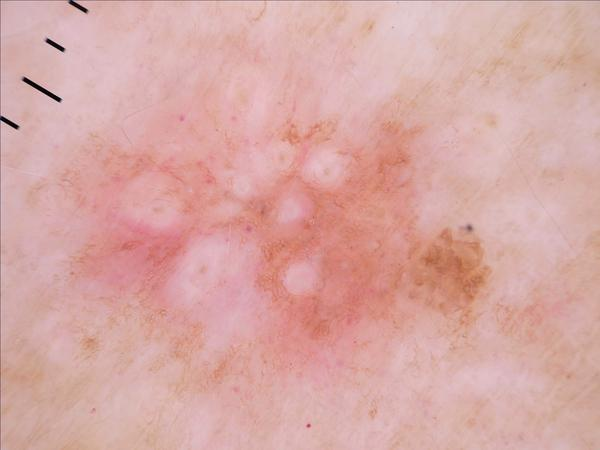

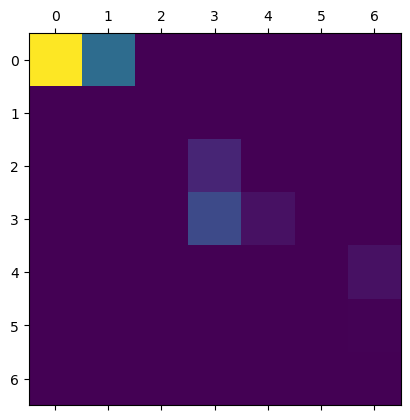

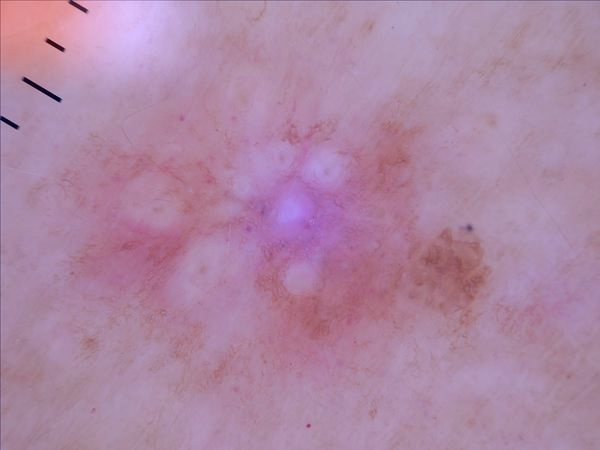

In [32]:
h1 = heat.heatmap(img_path,vgg,"block5_pool", vgg_preprocess_input)

# ResNet

In [7]:
resnet = load_model("ResNet.h5")

1/1 [==============================] - 0s 28ms/step
Predicted: [[0.05458381 0.01080923 0.2256533  0.7089537 ]]
Classes:  squamous


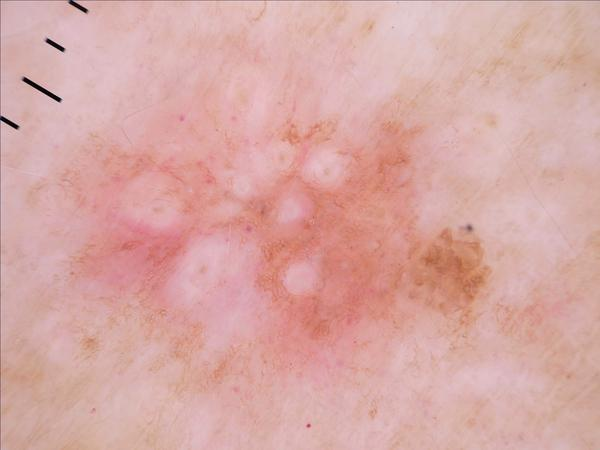

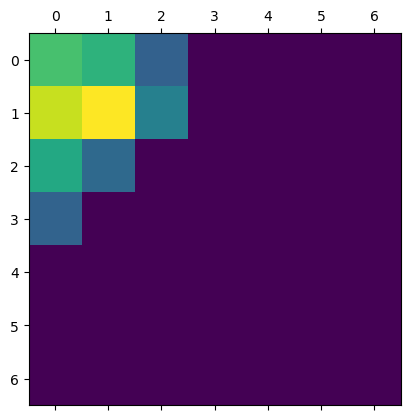

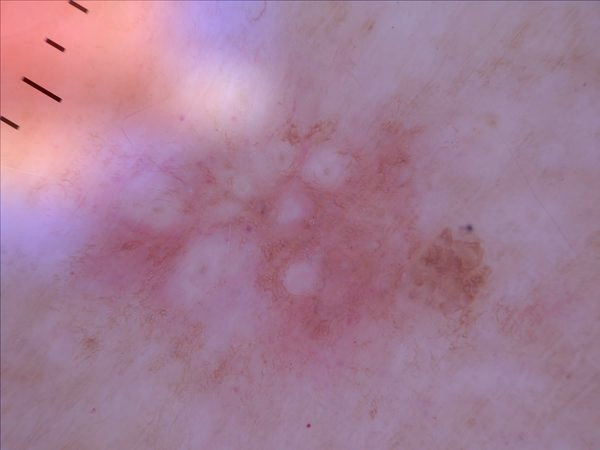

In [33]:
h2 = heat.heatmap(img_path,resnet,"conv5_block3_out", resnet_preprocess_input)

# Efficient Net

In [9]:
efficient = load_model("EfficientNet.h5")

1/1 [==============================] - 0s 27ms/step
Predicted: [[0.3177336  0.06902354 0.12336259 0.48988023]]
Classes:  squamous


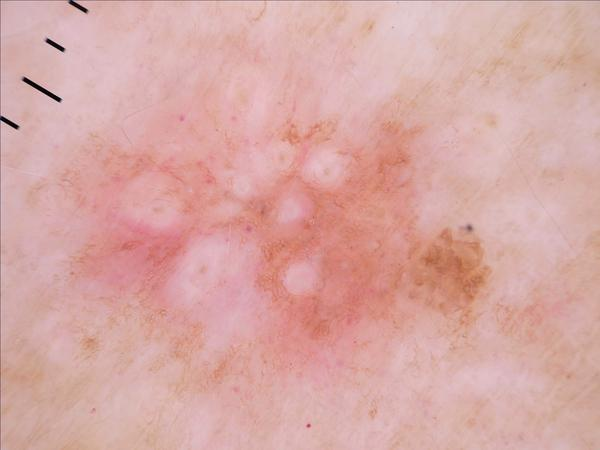

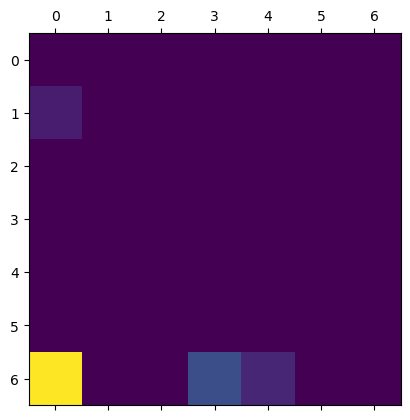

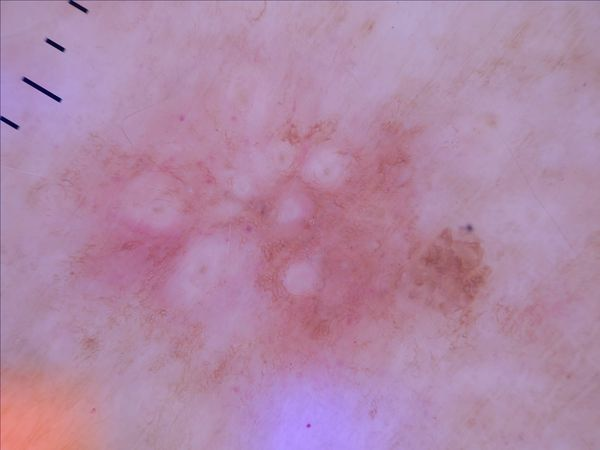

In [34]:
h3 = heat.heatmap(img_path,efficient,"block7a_expand_activation")

# Ensemble

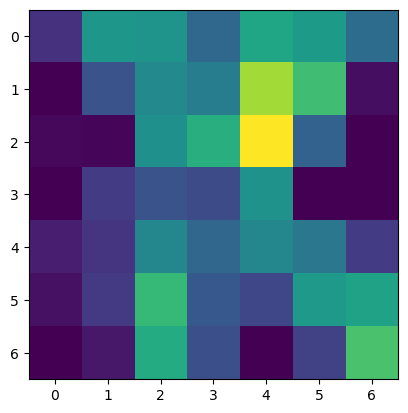

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

def weighted_heatmap(shape, heatmaps, weights, threshold):
    s = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            sum = 0
            for w,h in zip(weights,heatmaps):
                
                sum += w * h[i][j]
            s[i][j] = sum / len(heatmaps)
            if s[i][j] <= threshold:  
                s[i][j] = 0 
            else:
                s[i][j] *= 2
    return s

s = weighted_heatmap((7,7),[h1,h2,h3],[3,2,5],0.0)

plt.imshow(np.array(s), interpolation='none')
plt.show()



In [30]:
heat.save_and_display_gradcam(img_path,s,"cam.png")
